In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import math
import itertools

from BoltzmannValueIteration import BoltzmannValueIteration
from SetupDeterministicTransition import *
from SetupTransition import *
from SetupRewardTable import *
from visualizations import *

In [2]:
class getLikelihoodRewardFunction(object):
    def __init__(self, transitionTable, goalPolicies):
        self.transitionTable = transitionTable
        self.goalPolicies  = goalPolicies

    def __call__(self, trueGoal, originalReward):
        likelihoodRewardFunction = self.createLikelihoodReward(trueGoal)
        newReward = self.mergeRewards(originalReward, likelihoodRewardFunction)
        return(newReward)
    
    def createLikelihoodReward(self, trueGoal):
        rewardFunction = {state: {action :{nextState :  self.getLikelihoodRatio(state, nextState, trueGoal) \
                                             for nextState in self.transitionTable[state][action].keys() } \
                                    for action in self.transitionTable[state].keys() } \
                            for state in self.transitionTable.keys() }
        return(rewardFunction)
    
    def mergeRewards(self, reward1, reward2):
        mergedReward = {state: {action :{nextState :  reward1[state][action][nextState]+reward2[state][action][nextState] \
                                                     for nextState in reward1[state][action].keys() } \
                                            for action in reward1[state].keys() } \
                                    for state in reward1.keys() }
        return(mergedReward)
    
    def getLikelihoodRatio(self, state, nextState, goalTrue):
        infoScale =5
        goalLikelihood = self.getNextStateProbability(state, nextState, goalTrue)
        notGoalLikelihood = sum([self.getNextStateProbability(state, nextState, g)\
                                 for g in self.goalPolicies.keys()])
        
        likelihoodRatio = infoScale*goalLikelihood/notGoalLikelihood
        return(likelihoodRatio)
        
    def getNextStateProbability(self, state, nextState, goal):
        possibleActionsToNextState = [action for action in self.transitionTable[state] \
                                              if nextState in self.transitionTable[state][action]]
        probNextState = sum([self.transitionTable[state][action][nextState]*self.goalPolicies[goal][state][action] \
                             for action in possibleActionsToNextState])
        return(probNextState)


# Environment 1

In [3]:
environment1Transition = {(0, 0): {(1, 0): {(1, 0): 1},(0, 1): {(0, 1): 1},(-1, 0): {(0, 0): 1},(0, -1): {(0, 0): 1},(0, 0): {(0, 0): 1}},(0, 1): {(1, 0): {(1, 1): 1},(0, 1): {(0, 2): 1},(-1, 0): {(0, 1): 1},(0, -1): {(0, 0): 1},(0, 0): {(0, 1): 1}},(0, 2): {(1, 0): {(1, 2): 1},(0, 1): {(0, 3): 1},(-1, 0): {(0, 2): 1},(0, -1): {(0, 1): 1},(0, 0): {(0, 2): 1}},(0, 3): {(1, 0): {(1, 3): 1},(0, 1): {(0, 4): 1},(-1, 0): {(0, 3): 1},(0, -1): {(0, 2): 1},(0, 0): {(0, 3): 1}},(0, 4): {(1, 0): {(1, 4): 1},(0, 1): {(0, 5): 1},(-1, 0): {(0, 4): 1},(0, -1): {(0, 3): 1},(0, 0): {(0, 4): 1}},(0, 5): {(1, 0): {(1, 5): 1},(0, 1): {(0, 5): 1},(-1, 0): {(0, 5): 1},(0, -1): {(0, 4): 1},(0, 0): {(0, 5): 1}},(1, 0): {(1, 0): {(2, 0): 1},(0, 1): {(1, 1): 1},(-1, 0): {(0, 0): 1},(0, -1): {(1, 0): 1},(0, 0): {(1, 0): 1}},(1, 1): {(1, 0): {(2, 1): 1},(0, 1): {(1, 2): 1},(-1, 0): {(0, 1): 1},(0, -1): {(1, 0): 1},(0, 0): {(1, 1): 1}},(1, 2): {(1, 0): {(2, 2): 1},(0, 1): {(1, 3): 1},(-1, 0): {(0, 2): 1},(0, -1): {(1, 1): 1},(0, 0): {(1, 2): 1}},(1, 3): {(1, 0): {(2, 3): 1},(0, 1): {(1, 4): 1},(-1, 0): {(0, 3): 1},(0, -1): {(1, 2): 1},(0, 0): {(1, 3): 1}},(1, 4): {(1, 0): {(2, 4): 1},(0, 1): {(1, 5): 1},(-1, 0): {(0, 4): 1},(0, -1): {(1, 3): 1},(0, 0): {(1, 4): 1}},(1, 5): {(1, 0): {(2, 5): 1},(0, 1): {(1, 5): 1},(-1, 0): {(0, 5): 1},(0, -1): {(1, 4): 1},(0, 0): {(1, 5): 1}},(2, 0): {(1, 0): {(3, 0): 1},(0, 1): {(2, 1): 1},(-1, 0): {(1, 0): 1},(0, -1): {(2, 0): 1},(0, 0): {(2, 0): 1}},(2, 1): {(1, 0): {(3, 1): 1},(0, 1): {(2, 2): 1},(-1, 0): {(1, 1): 1},(0, -1): {(2, 0): 1},(0, 0): {(2, 1): 1}},(2, 2): {(1, 0): {(3, 2): 1},(0, 1): {(2, 3): 1},(-1, 0): {(1, 2): 1},(0, -1): {(2, 1): 1},(0, 0): {(2, 2): 1}},(2, 3): {(1, 0): {(3, 3): 1},(0, 1): {(2, 4): 1},(-1, 0): {(1, 3): 1},(0, -1): {(2, 2): 1},(0, 0): {(2, 3): 1}},(2, 4): {(1, 0): {(3, 4): 1},(0, 1): {(2, 5): 1},(-1, 0): {(1, 4): 1},(0, -1): {(2, 3): 1},(0, 0): {(2, 4): 1}},(2, 5): {(1, 0): {(3, 5): 1},(0, 1): {(2, 5): 1},(-1, 0): {(1, 5): 1},(0, -1): {(2, 4): 1},(0, 0): {(2, 5): 1}},(3, 0): {(1, 0): {(4, 0): 1},(0, 1): {(3, 1): 1},(-1, 0): {(2, 0): 1},(0, -1): {(3, 0): 1},(0, 0): {(3, 0): 1}},(3, 1): {(1, 0): {(4, 1): 1},(0, 1): {(3, 2): 1},(-1, 0): {(2, 1): 1},(0, -1): {(3, 0): 1},(0, 0): {(3, 1): 1}},(3, 2): {(1, 0): {(4, 2): 1},(0, 1): {(3, 3): 1},(-1, 0): {(2, 2): 1},(0, -1): {(3, 1): 1},(0, 0): {(3, 2): 1}},(3, 3): {(1, 0): {(4, 3): 1},(0, 1): {(3, 4): 1},(-1, 0): {(2, 3): 1},(0, -1): {(3, 2): 1},(0, 0): {(3, 3): 1}},(3, 4): {(1, 0): {(4, 4): 1},(0, 1): {(3, 5): 1},(-1, 0): {(2, 4): 1},(0, -1): {(3, 3): 1},(0, 0): {(3, 4): 1}},(3, 5): {(1, 0): {(4, 5): 1},(0, 1): {(3, 5): 1},(-1, 0): {(2, 5): 1},(0, -1): {(3, 4): 1},(0, 0): {(3, 5): 1}},(4, 0): {(1, 0): {(5, 0): 1},(0, 1): {(4, 1): 1},(-1, 0): {(3, 0): 1},(0, -1): {(4, 0): 1},(0, 0): {(4, 0): 1}},(4, 1): {(1, 0): {(5, 1): 1},(0, 1): {(4, 2): 1},(-1, 0): {(3, 1): 1},(0, -1): {(4, 0): 1},(0, 0): {(4, 1): 1}},(4, 2): {(1, 0): {(5, 2): 1},(0, 1): {(4, 3): 1},(-1, 0): {(3, 2): 1},(0, -1): {(4, 1): 1},(0, 0): {(4, 2): 1}},(4, 3): {(1, 0): {(5, 3): 1},(0, 1): {(4, 4): 1},(-1, 0): {(3, 3): 1},(0, -1): {(4, 2): 1},(0, 0): {(4, 3): 1}},(4, 4): {(1, 0): {(5, 4): 1},(0, 1): {(4, 5): 1},(-1, 0): {(3, 4): 1},(0, -1): {(4, 3): 1},(0, 0): {(4, 4): 1}},(4, 5): {(1, 0): {(5, 5): 1},(0, 1): {(4, 5): 1},(-1, 0): {(3, 5): 1},(0, -1): {(4, 4): 1},(0, 0): {(4, 5): 1}},(5, 0): {(1, 0): {(6, 0): 1},(0, 1): {(5, 1): 1},(-1, 0): {(4, 0): 1},(0, -1): {(5, 0): 1},(0, 0): {(5, 0): 1}},(5, 1): {(1, 0): {(6, 1): 1},(0, 1): {(5, 2): 1},(-1, 0): {(4, 1): 1},(0, -1): {(5, 0): 1},(0, 0): {(5, 1): 1}},(5, 2): {(1, 0): {(6, 2): 1},(0, 1): {(5, 3): 1},(-1, 0): {(4, 2): 1},(0, -1): {(5, 1): 1},(0, 0): {(5, 2): 1}},(5, 3): {(1, 0): {(6, 3): 1},(0, 1): {(5, 4): 1},(-1, 0): {(4, 3): 1},(0, -1): {(5, 2): 1},(0, 0): {(5, 3): 1}},(5, 4): {(1, 0): {(6, 4): 1},(0, 1): {(5, 5): 1},(-1, 0): {(4, 4): 1},(0, -1): {(5, 3): 1},(0, 0): {(5, 4): 1}},(5, 5): {(1, 0): {(6, 5): 1},(0, 1): {(5, 5): 1},(-1, 0): {(4, 5): 1},(0, -1): {(5, 4): 1},(0, 0): {(5, 5): 1}},(6, 0): {(1, 0): {(6, 0): 1},(0, 1): {(6, 1): 1},(-1, 0): {(5, 0): 1},(0, -1): {(6, 0): 1},(0, 0): {(6, 0): 1}},(6, 1): {(1, 0): {(6, 1): 1},(0, 1): {(6, 2): 1},(-1, 0): {(5, 1): 1},(0, -1): {(6, 0): 1},(0, 0): {(6, 1): 1}},(6, 2): {(1, 0): {(6, 2): 1},(0, 1): {(6, 3): 1},(-1, 0): {(5, 2): 1},(0, -1): {(6, 1): 1},(0, 0): {(6, 2): 1}},(6, 3): {(1, 0): {(6, 3): 1},(0, 1): {(6, 4): 1},(-1, 0): {(5, 3): 1},(0, -1): {(6, 2): 1},(0, 0): {(6, 3): 1}},(6, 4): {(1, 0): {(6, 4): 1},(0, 1): {(6, 5): 1},(-1, 0): {(5, 4): 1},(0, -1): {(6, 3): 1},(0, 0): {(6, 4): 1}},(6, 5): {(1, 0): {(6, 5): 1},(0, 1): {(6, 5): 1},(-1, 0): {(5, 5): 1},(0, -1): {(6, 4): 1},(0, 0): {(6, 5): 1}}}
rewardA = {(0, 0): {(1, 0): {(1, 0): -1},(0, 1): {(0, 1): -1},(-1, 0): {(0, 0): -1},(0, -1): {(0, 0): -1},(0, 0): {(0, 0): -0.1}},(0, 1): {(1, 0): {(1, 1): -1},(0, 1): {(0, 2): -1},(-1, 0): {(0, 1): -1},(0, -1): {(0, 0): -1},(0, 0): {(0, 1): -0.1}},(0, 2): {(1, 0): {(1, 2): -1},(0, 1): {(0, 3): -1},(-1, 0): {(0, 2): -1},(0, -1): {(0, 1): -1},(0, 0): {(0, 2): -0.1}},(0, 3): {(1, 0): {(1, 3): -1},(0, 1): {(0, 4): -1},(-1, 0): {(0, 3): -1},(0, -1): {(0, 2): -1},(0, 0): {(0, 3): -0.1}},(0, 4): {(1, 0): {(1, 4): -1},(0, 1): {(0, 5): -1},(-1, 0): {(0, 4): -1},(0, -1): {(0, 3): -1},(0, 0): {(0, 4): -0.1}},(0, 5): {(1, 0): {(1, 5): -1},(0, 1): {(0, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(0, 4): -1},(0, 0): {(0, 5): -0.1}},(1, 0): {(1, 0): {(2, 0): -1},(0, 1): {(1, 1): -1},(-1, 0): {(0, 0): -1},(0, -1): {(1, 0): -1},(0, 0): {(1, 0): -0.1}},(1, 1): {(1, 0): {(2, 1): -1},(0, 1): {(1, 2): -1},(-1, 0): {(0, 1): -1},(0, -1): {(1, 0): -1},(0, 0): {(1, 1): -0.1}},(1, 2): {(1, 0): {(2, 2): -1},(0, 1): {(1, 3): -1},(-1, 0): {(0, 2): -1},(0, -1): {(1, 1): -1},(0, 0): {(1, 2): -0.1}},(1, 3): {(1, 0): {(2, 3): -1},(0, 1): {(1, 4): -1},(-1, 0): {(0, 3): -1},(0, -1): {(1, 2): -1},(0, 0): {(1, 3): -0.1}},(1, 4): {(1, 0): {(2, 4): -1},(0, 1): {(1, 5): -1},(-1, 0): {(0, 4): -1},(0, -1): {(1, 3): -1},(0, 0): {(1, 4): -0.1}},(1, 5): {(1, 0): {(2, 5): -1},(0, 1): {(1, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(1, 4): -1},(0, 0): {(1, 5): -0.1}},(2, 0): {(1, 0): {(3, 0): -1},(0, 1): {(2, 1): -1},(-1, 0): {(1, 0): -1},(0, -1): {(2, 0): -1},(0, 0): {(2, 0): -0.1}},(2, 1): {(1, 0): {(3, 1): -1},(0, 1): {(2, 2): -1},(-1, 0): {(1, 1): -1},(0, -1): {(2, 0): -1},(0, 0): {(2, 1): -0.1}},(2, 2): {(1, 0): {(3, 2): -1},(0, 1): {(2, 3): -1},(-1, 0): {(1, 2): -1},(0, -1): {(2, 1): -1},(0, 0): {(2, 2): -0.1}},(2, 3): {(1, 0): {(3, 3): -1},(0, 1): {(2, 4): -1},(-1, 0): {(1, 3): -1},(0, -1): {(2, 2): -1},(0, 0): {(2, 3): -0.1}},(2, 4): {(1, 0): {(3, 4): -1},(0, 1): {(2, 5): -1},(-1, 0): {(1, 4): -1},(0, -1): {(2, 3): -1},(0, 0): {(2, 4): -0.1}},(2, 5): {(1, 0): {(3, 5): -1},(0, 1): {(2, 5): -1},(-1, 0): {(1, 5): -1},(0, -1): {(2, 4): -1},(0, 0): {(2, 5): -0.1}},(3, 0): {(1, 0): {(4, 0): -100},(0, 1): {(3, 1): -100},(-1, 0): {(2, 0): -100},(0, -1): {(3, 0): -100},(0, 0): {(3, 0): -100}},(3, 1): {(1, 0): {(4, 1): -100},(0, 1): {(3, 2): -100},(-1, 0): {(2, 1): -100},(0, -1): {(3, 0): -100},(0, 0): {(3, 1): -100}},(3, 2): {(1, 0): {(4, 2): -1},(0, 1): {(3, 3): -1},(-1, 0): {(2, 2): -1},(0, -1): {(3, 1): -1},(0, 0): {(3, 2): -0.1}},(3, 3): {(1, 0): {(4, 3): -100},(0, 1): {(3, 4): -100},(-1, 0): {(2, 3): -100},(0, -1): {(3, 2): -100},(0, 0): {(3, 3): -100}},(3, 4): {(1, 0): {(4, 4): -1},(0, 1): {(3, 5): -1},(-1, 0): {(2, 4): -1},(0, -1): {(3, 3): -1},(0, 0): {(3, 4): -0.1}},(3, 5): {(1, 0): {(4, 5): -1},(0, 1): {(3, 5): -1},(-1, 0): {(2, 5): -1},(0, -1): {(3, 4): -1},(0, 0): {(3, 5): -0.1}},(4, 0): {(1, 0): {(5, 0): -1},(0, 1): {(4, 1): -1},(-1, 0): {(3, 0): -1},(0, -1): {(4, 0): -1},(0, 0): {(4, 0): -0.1}},(4, 1): {(1, 0): {(5, 1): -1},(0, 1): {(4, 2): -1},(-1, 0): {(3, 1): -1},(0, -1): {(4, 0): -1},(0, 0): {(4, 1): -0.1}},(4, 2): {(1, 0): {(5, 2): -1},(0, 1): {(4, 3): -1},(-1, 0): {(3, 2): -1},(0, -1): {(4, 1): -1},(0, 0): {(4, 2): -0.1}},(4, 3): {(1, 0): {(5, 3): -1},(0, 1): {(4, 4): -1},(-1, 0): {(3, 3): -1},(0, -1): {(4, 2): -1},(0, 0): {(4, 3): -0.1}},(4, 4): {(1, 0): {(5, 4): -1},(0, 1): {(4, 5): -1},(-1, 0): {(3, 4): -1},(0, -1): {(4, 3): -1},(0, 0): {(4, 4): -0.1}},(4, 5): {(1, 0): {(5, 5): -1},(0, 1): {(4, 5): -1},(-1, 0): {(3, 5): -1},(0, -1): {(4, 4): -1},(0, 0): {(4, 5): -0.1}},(5, 0): {(1, 0): {(6, 0): -1},(0, 1): {(5, 1): -1},(-1, 0): {(4, 0): -1},(0, -1): {(5, 0): -1},(0, 0): {(5, 0): -0.1}},(5, 1): {(1, 0): {(6, 1): -1},(0, 1): {(5, 2): -1},(-1, 0): {(4, 1): -1},(0, -1): {(5, 0): -1},(0, 0): {(5, 1): -0.1}},(5, 2): {(1, 0): {(6, 2): -1},(0, 1): {(5, 3): -1},(-1, 0): {(4, 2): -1},(0, -1): {(5, 1): -1},(0, 0): {(5, 2): -0.1}},(5, 3): {(1, 0): {(6, 3): -1},(0, 1): {(5, 4): -1},(-1, 0): {(4, 3): -1},(0, -1): {(5, 2): -1},(0, 0): {(5, 3): -0.1}},(5, 4): {(1, 0): {(6, 4): -1},(0, 1): {(5, 5): -1},(-1, 0): {(4, 4): -1},(0, -1): {(5, 3): -1},(0, 0): {(5, 4): -0.1}},(5, 5): {(1, 0): {(6, 5): -1},(0, 1): {(5, 5): -1},(-1, 0): {(4, 5): -1},(0, -1): {(5, 4): -1},(0, 0): {(5, 5): -0.1}},(6, 0): {(1, 0): {(6, 0): -1},(0, 1): {(6, 1): -1},(-1, 0): {(5, 0): -1},(0, -1): {(6, 0): -1},(0, 0): {(6, 0): -0.1}},(6, 1): {(1, 0): {(6, 1): 9},(0, 1): {(6, 2): 9},(-1, 0): {(5, 1): 9},(0, -1): {(6, 0): 9},(0, 0): {(6, 1): 9.9}},(6, 2): {(1, 0): {(6, 2): -1},(0, 1): {(6, 3): -1},(-1, 0): {(5, 2): -1},(0, -1): {(6, 1): -1},(0, 0): {(6, 2): -0.1}},(6, 3): {(1, 0): {(6, 3): -1},(0, 1): {(6, 4): -1},(-1, 0): {(5, 3): -1},(0, -1): {(6, 2): -1},(0, 0): {(6, 3): -0.1}},(6, 4): {(1, 0): {(6, 4): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 4): -1},(0, -1): {(6, 3): -1},(0, 0): {(6, 4): -0.1}},(6, 5): {(1, 0): {(6, 5): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 5): -1},(0, -1): {(6, 4): -1},(0, 0): {(6, 5): -0.1}}}
rewardB = {(0, 0): {(1, 0): {(1, 0): -1},(0, 1): {(0, 1): -1},(-1, 0): {(0, 0): -1},(0, -1): {(0, 0): -1},(0, 0): {(0, 0): -0.1}},(0, 1): {(1, 0): {(1, 1): -1},(0, 1): {(0, 2): -1},(-1, 0): {(0, 1): -1},(0, -1): {(0, 0): -1},(0, 0): {(0, 1): -0.1}},(0, 2): {(1, 0): {(1, 2): -1},(0, 1): {(0, 3): -1},(-1, 0): {(0, 2): -1},(0, -1): {(0, 1): -1},(0, 0): {(0, 2): -0.1}},(0, 3): {(1, 0): {(1, 3): -1},(0, 1): {(0, 4): -1},(-1, 0): {(0, 3): -1},(0, -1): {(0, 2): -1},(0, 0): {(0, 3): -0.1}},(0, 4): {(1, 0): {(1, 4): -1},(0, 1): {(0, 5): -1},(-1, 0): {(0, 4): -1},(0, -1): {(0, 3): -1},(0, 0): {(0, 4): -0.1}},(0, 5): {(1, 0): {(1, 5): -1},(0, 1): {(0, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(0, 4): -1},(0, 0): {(0, 5): -0.1}},(1, 0): {(1, 0): {(2, 0): -1},(0, 1): {(1, 1): -1},(-1, 0): {(0, 0): -1},(0, -1): {(1, 0): -1},(0, 0): {(1, 0): -0.1}},(1, 1): {(1, 0): {(2, 1): -1},(0, 1): {(1, 2): -1},(-1, 0): {(0, 1): -1},(0, -1): {(1, 0): -1},(0, 0): {(1, 1): -0.1}},(1, 2): {(1, 0): {(2, 2): -1},(0, 1): {(1, 3): -1},(-1, 0): {(0, 2): -1},(0, -1): {(1, 1): -1},(0, 0): {(1, 2): -0.1}},(1, 3): {(1, 0): {(2, 3): -1},(0, 1): {(1, 4): -1},(-1, 0): {(0, 3): -1},(0, -1): {(1, 2): -1},(0, 0): {(1, 3): -0.1}},(1, 4): {(1, 0): {(2, 4): -1},(0, 1): {(1, 5): -1},(-1, 0): {(0, 4): -1},(0, -1): {(1, 3): -1},(0, 0): {(1, 4): -0.1}},(1, 5): {(1, 0): {(2, 5): -1},(0, 1): {(1, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(1, 4): -1},(0, 0): {(1, 5): -0.1}},(2, 0): {(1, 0): {(3, 0): -1},(0, 1): {(2, 1): -1},(-1, 0): {(1, 0): -1},(0, -1): {(2, 0): -1},(0, 0): {(2, 0): -0.1}},(2, 1): {(1, 0): {(3, 1): -1},(0, 1): {(2, 2): -1},(-1, 0): {(1, 1): -1},(0, -1): {(2, 0): -1},(0, 0): {(2, 1): -0.1}},(2, 2): {(1, 0): {(3, 2): -1},(0, 1): {(2, 3): -1},(-1, 0): {(1, 2): -1},(0, -1): {(2, 1): -1},(0, 0): {(2, 2): -0.1}},(2, 3): {(1, 0): {(3, 3): -1},(0, 1): {(2, 4): -1},(-1, 0): {(1, 3): -1},(0, -1): {(2, 2): -1},(0, 0): {(2, 3): -0.1}},(2, 4): {(1, 0): {(3, 4): -1},(0, 1): {(2, 5): -1},(-1, 0): {(1, 4): -1},(0, -1): {(2, 3): -1},(0, 0): {(2, 4): -0.1}},(2, 5): {(1, 0): {(3, 5): -1},(0, 1): {(2, 5): -1},(-1, 0): {(1, 5): -1},(0, -1): {(2, 4): -1},(0, 0): {(2, 5): -0.1}},(3, 0): {(1, 0): {(4, 0): -100},(0, 1): {(3, 1): -100},(-1, 0): {(2, 0): -100},(0, -1): {(3, 0): -100},(0, 0): {(3, 0): -100}},(3, 1): {(1, 0): {(4, 1): -100},(0, 1): {(3, 2): -100},(-1, 0): {(2, 1): -100},(0, -1): {(3, 0): -100},(0, 0): {(3, 1): -100}},(3, 2): {(1, 0): {(4, 2): -1},(0, 1): {(3, 3): -1},(-1, 0): {(2, 2): -1},(0, -1): {(3, 1): -1},(0, 0): {(3, 2): -0.1}},(3, 3): {(1, 0): {(4, 3): -100},(0, 1): {(3, 4): -100},(-1, 0): {(2, 3): -100},(0, -1): {(3, 2): -100},(0, 0): {(3, 3): -100}},(3, 4): {(1, 0): {(4, 4): -1},(0, 1): {(3, 5): -1},(-1, 0): {(2, 4): -1},(0, -1): {(3, 3): -1},(0, 0): {(3, 4): -0.1}},(3, 5): {(1, 0): {(4, 5): -1},(0, 1): {(3, 5): -1},(-1, 0): {(2, 5): -1},(0, -1): {(3, 4): -1},(0, 0): {(3, 5): -0.1}},(4, 0): {(1, 0): {(5, 0): -1},(0, 1): {(4, 1): -1},(-1, 0): {(3, 0): -1},(0, -1): {(4, 0): -1},(0, 0): {(4, 0): -0.1}},(4, 1): {(1, 0): {(5, 1): -1},(0, 1): {(4, 2): -1},(-1, 0): {(3, 1): -1},(0, -1): {(4, 0): -1},(0, 0): {(4, 1): -0.1}},(4, 2): {(1, 0): {(5, 2): -1},(0, 1): {(4, 3): -1},(-1, 0): {(3, 2): -1},(0, -1): {(4, 1): -1},(0, 0): {(4, 2): -0.1}},(4, 3): {(1, 0): {(5, 3): -1},(0, 1): {(4, 4): -1},(-1, 0): {(3, 3): -1},(0, -1): {(4, 2): -1},(0, 0): {(4, 3): -0.1}},(4, 4): {(1, 0): {(5, 4): -1},(0, 1): {(4, 5): -1},(-1, 0): {(3, 4): -1},(0, -1): {(4, 3): -1},(0, 0): {(4, 4): -0.1}},(4, 5): {(1, 0): {(5, 5): -1},(0, 1): {(4, 5): -1},(-1, 0): {(3, 5): -1},(0, -1): {(4, 4): -1},(0, 0): {(4, 5): -0.1}},(5, 0): {(1, 0): {(6, 0): -1},(0, 1): {(5, 1): -1},(-1, 0): {(4, 0): -1},(0, -1): {(5, 0): -1},(0, 0): {(5, 0): -0.1}},(5, 1): {(1, 0): {(6, 1): -1},(0, 1): {(5, 2): -1},(-1, 0): {(4, 1): -1},(0, -1): {(5, 0): -1},(0, 0): {(5, 1): -0.1}},(5, 2): {(1, 0): {(6, 2): -1},(0, 1): {(5, 3): -1},(-1, 0): {(4, 2): -1},(0, -1): {(5, 1): -1},(0, 0): {(5, 2): -0.1}},(5, 3): {(1, 0): {(6, 3): -1},(0, 1): {(5, 4): -1},(-1, 0): {(4, 3): -1},(0, -1): {(5, 2): -1},(0, 0): {(5, 3): -0.1}},(5, 4): {(1, 0): {(6, 4): -1},(0, 1): {(5, 5): -1},(-1, 0): {(4, 4): -1},(0, -1): {(5, 3): -1},(0, 0): {(5, 4): -0.1}},(5, 5): {(1, 0): {(6, 5): -1},(0, 1): {(5, 5): -1},(-1, 0): {(4, 5): -1},(0, -1): {(5, 4): -1},(0, 0): {(5, 5): -0.1}},(6, 0): {(1, 0): {(6, 0): -1},(0, 1): {(6, 1): -1},(-1, 0): {(5, 0): -1},(0, -1): {(6, 0): -1},(0, 0): {(6, 0): -0.1}},(6, 1): {(1, 0): {(6, 1): -1},(0, 1): {(6, 2): -1},(-1, 0): {(5, 1): -1},(0, -1): {(6, 0): -1},(0, 0): {(6, 1): -0.1}},(6, 2): {(1, 0): {(6, 2): -1},(0, 1): {(6, 3): -1},(-1, 0): {(5, 2): -1},(0, -1): {(6, 1): -1},(0, 0): {(6, 2): -0.1}},(6, 3): {(1, 0): {(6, 3): -1},(0, 1): {(6, 4): -1},(-1, 0): {(5, 3): -1},(0, -1): {(6, 2): -1},(0, 0): {(6, 3): -0.1}},(6, 4): {(1, 0): {(6, 4): 9},(0, 1): {(6, 5): 9},(-1, 0): {(5, 4): 9},(0, -1): {(6, 3): 9},(0, 0): {(6, 4): 9.9}},(6, 5): {(1, 0): {(6, 5): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 5): -1},(0, -1): {(6, 4): -1},(0, 0): {(6, 5): -0.1}}}
rewardC = {(0, 0): {(1, 0): {(1, 0): -1},(0, 1): {(0, 1): -1},(-1, 0): {(0, 0): -1},(0, -1): {(0, 0): -1},(0, 0): {(0, 0): -0.1}},(0, 1): {(1, 0): {(1, 1): -1},(0, 1): {(0, 2): -1},(-1, 0): {(0, 1): -1},(0, -1): {(0, 0): -1},(0, 0): {(0, 1): -0.1}},(0, 2): {(1, 0): {(1, 2): -1},(0, 1): {(0, 3): -1},(-1, 0): {(0, 2): -1},(0, -1): {(0, 1): -1},(0, 0): {(0, 2): -0.1}},(0, 3): {(1, 0): {(1, 3): -1},(0, 1): {(0, 4): -1},(-1, 0): {(0, 3): -1},(0, -1): {(0, 2): -1},(0, 0): {(0, 3): -0.1}},(0, 4): {(1, 0): {(1, 4): -1},(0, 1): {(0, 5): -1},(-1, 0): {(0, 4): -1},(0, -1): {(0, 3): -1},(0, 0): {(0, 4): -0.1}},(0, 5): {(1, 0): {(1, 5): -1},(0, 1): {(0, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(0, 4): -1},(0, 0): {(0, 5): -0.1}},(1, 0): {(1, 0): {(2, 0): -1},(0, 1): {(1, 1): -1},(-1, 0): {(0, 0): -1},(0, -1): {(1, 0): -1},(0, 0): {(1, 0): -0.1}},(1, 1): {(1, 0): {(2, 1): -1},(0, 1): {(1, 2): -1},(-1, 0): {(0, 1): -1},(0, -1): {(1, 0): -1},(0, 0): {(1, 1): -0.1}},(1, 2): {(1, 0): {(2, 2): -1},(0, 1): {(1, 3): -1},(-1, 0): {(0, 2): -1},(0, -1): {(1, 1): -1},(0, 0): {(1, 2): -0.1}},(1, 3): {(1, 0): {(2, 3): -1},(0, 1): {(1, 4): -1},(-1, 0): {(0, 3): -1},(0, -1): {(1, 2): -1},(0, 0): {(1, 3): -0.1}},(1, 4): {(1, 0): {(2, 4): -1},(0, 1): {(1, 5): -1},(-1, 0): {(0, 4): -1},(0, -1): {(1, 3): -1},(0, 0): {(1, 4): -0.1}},(1, 5): {(1, 0): {(2, 5): 9},(0, 1): {(1, 5): 9},(-1, 0): {(0, 5): 9},(0, -1): {(1, 4): 9},(0, 0): {(1, 5): 9.9}},(2, 0): {(1, 0): {(3, 0): -1},(0, 1): {(2, 1): -1},(-1, 0): {(1, 0): -1},(0, -1): {(2, 0): -1},(0, 0): {(2, 0): -0.1}},(2, 1): {(1, 0): {(3, 1): -1},(0, 1): {(2, 2): -1},(-1, 0): {(1, 1): -1},(0, -1): {(2, 0): -1},(0, 0): {(2, 1): -0.1}},(2, 2): {(1, 0): {(3, 2): -1},(0, 1): {(2, 3): -1},(-1, 0): {(1, 2): -1},(0, -1): {(2, 1): -1},(0, 0): {(2, 2): -0.1}},(2, 3): {(1, 0): {(3, 3): -1},(0, 1): {(2, 4): -1},(-1, 0): {(1, 3): -1},(0, -1): {(2, 2): -1},(0, 0): {(2, 3): -0.1}},(2, 4): {(1, 0): {(3, 4): -1},(0, 1): {(2, 5): -1},(-1, 0): {(1, 4): -1},(0, -1): {(2, 3): -1},(0, 0): {(2, 4): -0.1}},(2, 5): {(1, 0): {(3, 5): -1},(0, 1): {(2, 5): -1},(-1, 0): {(1, 5): -1},(0, -1): {(2, 4): -1},(0, 0): {(2, 5): -0.1}},(3, 0): {(1, 0): {(4, 0): -100},(0, 1): {(3, 1): -100},(-1, 0): {(2, 0): -100},(0, -1): {(3, 0): -100},(0, 0): {(3, 0): -100}},(3, 1): {(1, 0): {(4, 1): -100},(0, 1): {(3, 2): -100},(-1, 0): {(2, 1): -100},(0, -1): {(3, 0): -100},(0, 0): {(3, 1): -100}},(3, 2): {(1, 0): {(4, 2): -1},(0, 1): {(3, 3): -1},(-1, 0): {(2, 2): -1},(0, -1): {(3, 1): -1},(0, 0): {(3, 2): -0.1}},(3, 3): {(1, 0): {(4, 3): -100},(0, 1): {(3, 4): -100},(-1, 0): {(2, 3): -100},(0, -1): {(3, 2): -100},(0, 0): {(3, 3): -100}},(3, 4): {(1, 0): {(4, 4): -1},(0, 1): {(3, 5): -1},(-1, 0): {(2, 4): -1},(0, -1): {(3, 3): -1},(0, 0): {(3, 4): -0.1}},(3, 5): {(1, 0): {(4, 5): -1},(0, 1): {(3, 5): -1},(-1, 0): {(2, 5): -1},(0, -1): {(3, 4): -1},(0, 0): {(3, 5): -0.1}},(4, 0): {(1, 0): {(5, 0): -1},(0, 1): {(4, 1): -1},(-1, 0): {(3, 0): -1},(0, -1): {(4, 0): -1},(0, 0): {(4, 0): -0.1}},(4, 1): {(1, 0): {(5, 1): -1},(0, 1): {(4, 2): -1},(-1, 0): {(3, 1): -1},(0, -1): {(4, 0): -1},(0, 0): {(4, 1): -0.1}},(4, 2): {(1, 0): {(5, 2): -1},(0, 1): {(4, 3): -1},(-1, 0): {(3, 2): -1},(0, -1): {(4, 1): -1},(0, 0): {(4, 2): -0.1}},(4, 3): {(1, 0): {(5, 3): -1},(0, 1): {(4, 4): -1},(-1, 0): {(3, 3): -1},(0, -1): {(4, 2): -1},(0, 0): {(4, 3): -0.1}},(4, 4): {(1, 0): {(5, 4): -1},(0, 1): {(4, 5): -1},(-1, 0): {(3, 4): -1},(0, -1): {(4, 3): -1},(0, 0): {(4, 4): -0.1}},(4, 5): {(1, 0): {(5, 5): -1},(0, 1): {(4, 5): -1},(-1, 0): {(3, 5): -1},(0, -1): {(4, 4): -1},(0, 0): {(4, 5): -0.1}},(5, 0): {(1, 0): {(6, 0): -1},(0, 1): {(5, 1): -1},(-1, 0): {(4, 0): -1},(0, -1): {(5, 0): -1},(0, 0): {(5, 0): -0.1}},(5, 1): {(1, 0): {(6, 1): -1},(0, 1): {(5, 2): -1},(-1, 0): {(4, 1): -1},(0, -1): {(5, 0): -1},(0, 0): {(5, 1): -0.1}},(5, 2): {(1, 0): {(6, 2): -1},(0, 1): {(5, 3): -1},(-1, 0): {(4, 2): -1},(0, -1): {(5, 1): -1},(0, 0): {(5, 2): -0.1}},(5, 3): {(1, 0): {(6, 3): -1},(0, 1): {(5, 4): -1},(-1, 0): {(4, 3): -1},(0, -1): {(5, 2): -1},(0, 0): {(5, 3): -0.1}},(5, 4): {(1, 0): {(6, 4): -1},(0, 1): {(5, 5): -1},(-1, 0): {(4, 4): -1},(0, -1): {(5, 3): -1},(0, 0): {(5, 4): -0.1}},(5, 5): {(1, 0): {(6, 5): -1},(0, 1): {(5, 5): -1},(-1, 0): {(4, 5): -1},(0, -1): {(5, 4): -1},(0, 0): {(5, 5): -0.1}},(6, 0): {(1, 0): {(6, 0): -1},(0, 1): {(6, 1): -1},(-1, 0): {(5, 0): -1},(0, -1): {(6, 0): -1},(0, 0): {(6, 0): -0.1}},(6, 1): {(1, 0): {(6, 1): -1},(0, 1): {(6, 2): -1},(-1, 0): {(5, 1): -1},(0, -1): {(6, 0): -1},(0, 0): {(6, 1): -0.1}},(6, 2): {(1, 0): {(6, 2): -1},(0, 1): {(6, 3): -1},(-1, 0): {(5, 2): -1},(0, -1): {(6, 1): -1},(0, 0): {(6, 2): -0.1}},(6, 3): {(1, 0): {(6, 3): -1},(0, 1): {(6, 4): -1},(-1, 0): {(5, 3): -1},(0, -1): {(6, 2): -1},(0, 0): {(6, 3): -0.1}},(6, 4): {(1, 0): {(6, 4): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 4): -1},(0, -1): {(6, 3): -1},(0, 0): {(6, 4): -0.1}},(6, 5): {(1, 0): {(6, 5): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 5): -1},(0, -1): {(6, 4): -1},(0, 0): {(6, 5): -0.1}}}

In [4]:
gridWidth = 7
gridHeight = 6
allActions = [(1,0), (0,1), (-1,0), (0,-1), (0,0)]
trapStates = [(3,0), (3,1), (3,3)]
otherGoals = [(6,1), (6,4), (1,5)]

convergenceThreshold = 10e-7
gamma = .9
beta = 2

getTransition = SetupDeterministicTransition(gridWidth, gridHeight, allActions)
#environment1Transition = getTransition()

In [5]:
environment1Transition

{(0, 0): {(1, 0): {(1, 0): 1},
  (0, 1): {(0, 1): 1},
  (-1, 0): {(0, 0): 1},
  (0, -1): {(0, 0): 1},
  (0, 0): {(0, 0): 1}},
 (0, 1): {(1, 0): {(1, 1): 1},
  (0, 1): {(0, 2): 1},
  (-1, 0): {(0, 1): 1},
  (0, -1): {(0, 0): 1},
  (0, 0): {(0, 1): 1}},
 (0, 2): {(1, 0): {(1, 2): 1},
  (0, 1): {(0, 3): 1},
  (-1, 0): {(0, 2): 1},
  (0, -1): {(0, 1): 1},
  (0, 0): {(0, 2): 1}},
 (0, 3): {(1, 0): {(1, 3): 1},
  (0, 1): {(0, 4): 1},
  (-1, 0): {(0, 3): 1},
  (0, -1): {(0, 2): 1},
  (0, 0): {(0, 3): 1}},
 (0, 4): {(1, 0): {(1, 4): 1},
  (0, 1): {(0, 5): 1},
  (-1, 0): {(0, 4): 1},
  (0, -1): {(0, 3): 1},
  (0, 0): {(0, 4): 1}},
 (0, 5): {(1, 0): {(1, 5): 1},
  (0, 1): {(0, 5): 1},
  (-1, 0): {(0, 5): 1},
  (0, -1): {(0, 4): 1},
  (0, 0): {(0, 5): 1}},
 (1, 0): {(1, 0): {(2, 0): 1},
  (0, 1): {(1, 1): 1},
  (-1, 0): {(0, 0): 1},
  (0, -1): {(1, 0): 1},
  (0, 0): {(1, 0): 1}},
 (1, 1): {(1, 0): {(2, 1): 1},
  (0, 1): {(1, 2): 1},
  (-1, 0): {(0, 1): 1},
  (0, -1): {(1, 0): 1},
  (0, 0): {(1, 1

## Goal A

In [6]:
goalA = (6,1)
getRewardA = SetupRewardTable(environment1Transition, allActions, goalA, trapStates)
#rewardA = getRewardA()
valueA = {state:0 for state in rewardA.keys()}

getPolicyA = BoltzmannValueIteration(environment1Transition, rewardA, valueA, convergenceThreshold, gamma, beta)
optimalValuesA, policyA = getPolicyA()

In [7]:
rewardA

{(0, 0): {(1, 0): {(1, 0): -1},
  (0, 1): {(0, 1): -1},
  (-1, 0): {(0, 0): -1},
  (0, -1): {(0, 0): -1},
  (0, 0): {(0, 0): -0.1}},
 (0, 1): {(1, 0): {(1, 1): -1},
  (0, 1): {(0, 2): -1},
  (-1, 0): {(0, 1): -1},
  (0, -1): {(0, 0): -1},
  (0, 0): {(0, 1): -0.1}},
 (0, 2): {(1, 0): {(1, 2): -1},
  (0, 1): {(0, 3): -1},
  (-1, 0): {(0, 2): -1},
  (0, -1): {(0, 1): -1},
  (0, 0): {(0, 2): -0.1}},
 (0, 3): {(1, 0): {(1, 3): -1},
  (0, 1): {(0, 4): -1},
  (-1, 0): {(0, 3): -1},
  (0, -1): {(0, 2): -1},
  (0, 0): {(0, 3): -0.1}},
 (0, 4): {(1, 0): {(1, 4): -1},
  (0, 1): {(0, 5): -1},
  (-1, 0): {(0, 4): -1},
  (0, -1): {(0, 3): -1},
  (0, 0): {(0, 4): -0.1}},
 (0, 5): {(1, 0): {(1, 5): -1},
  (0, 1): {(0, 5): -1},
  (-1, 0): {(0, 5): -1},
  (0, -1): {(0, 4): -1},
  (0, 0): {(0, 5): -0.1}},
 (1, 0): {(1, 0): {(2, 0): -1},
  (0, 1): {(1, 1): -1},
  (-1, 0): {(0, 0): -1},
  (0, -1): {(1, 0): -1},
  (0, 0): {(1, 0): -0.1}},
 (1, 1): {(1, 0): {(2, 1): -1},
  (0, 1): {(1, 2): -1},
  (-1, 0): {(

In [8]:
policyA[goalA]

{(1, 0): 0.1418510647185461,
 (0, 1): 4.2753882570447074e-10,
 (-1, 0): 4.2753814143152796e-10,
 (0, -1): 4.2753814143152796e-10,
 (0, 0): 0.8581489339988387}

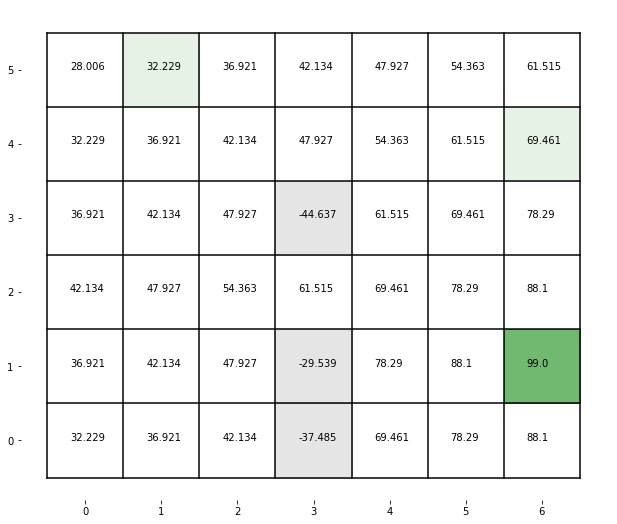

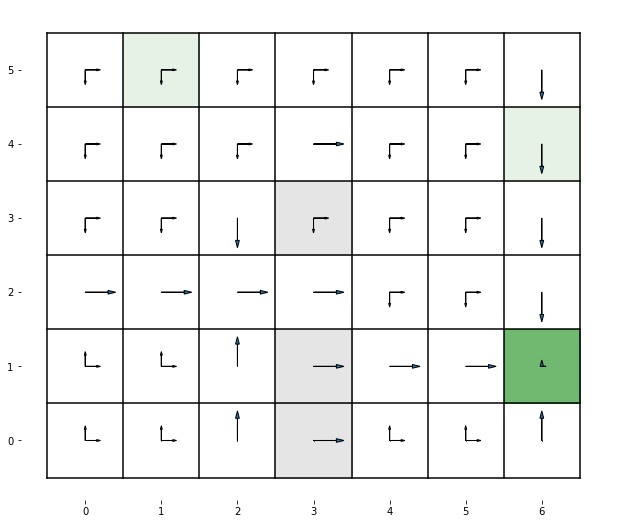

In [9]:
visualizeValueTable(gridWidth = gridWidth, gridHeight = gridHeight, goalState = goalA, otherGoals = otherGoals, trapStates = trapStates, valueTable = optimalValuesA)
visualizePolicy(gridWidth, gridHeight, goalA, otherGoals, trapStates, policyA)

## Goal B

In [10]:
goalB = (6,4)
getRewardB = SetupRewardTable(environment1Transition, allActions, goalB, trapStates)
#rewardB = getRewardB()
valueB = {state:0 for state in rewardB.keys()}

getPolicyB = BoltzmannValueIteration(environment1Transition, rewardB, valueB, convergenceThreshold, gamma, beta)
optimalValuesB, policyB = getPolicyB()

In [11]:
rewardB

{(0, 0): {(1, 0): {(1, 0): -1},
  (0, 1): {(0, 1): -1},
  (-1, 0): {(0, 0): -1},
  (0, -1): {(0, 0): -1},
  (0, 0): {(0, 0): -0.1}},
 (0, 1): {(1, 0): {(1, 1): -1},
  (0, 1): {(0, 2): -1},
  (-1, 0): {(0, 1): -1},
  (0, -1): {(0, 0): -1},
  (0, 0): {(0, 1): -0.1}},
 (0, 2): {(1, 0): {(1, 2): -1},
  (0, 1): {(0, 3): -1},
  (-1, 0): {(0, 2): -1},
  (0, -1): {(0, 1): -1},
  (0, 0): {(0, 2): -0.1}},
 (0, 3): {(1, 0): {(1, 3): -1},
  (0, 1): {(0, 4): -1},
  (-1, 0): {(0, 3): -1},
  (0, -1): {(0, 2): -1},
  (0, 0): {(0, 3): -0.1}},
 (0, 4): {(1, 0): {(1, 4): -1},
  (0, 1): {(0, 5): -1},
  (-1, 0): {(0, 4): -1},
  (0, -1): {(0, 3): -1},
  (0, 0): {(0, 4): -0.1}},
 (0, 5): {(1, 0): {(1, 5): -1},
  (0, 1): {(0, 5): -1},
  (-1, 0): {(0, 5): -1},
  (0, -1): {(0, 4): -1},
  (0, 0): {(0, 5): -0.1}},
 (1, 0): {(1, 0): {(2, 0): -1},
  (0, 1): {(1, 1): -1},
  (-1, 0): {(0, 0): -1},
  (0, -1): {(1, 0): -1},
  (0, 0): {(1, 0): -0.1}},
 (1, 1): {(1, 0): {(2, 1): -1},
  (0, 1): {(1, 2): -1},
  (-1, 0): {(

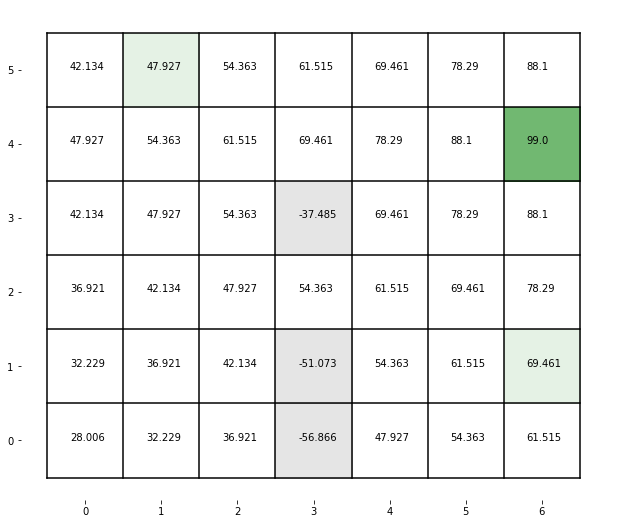

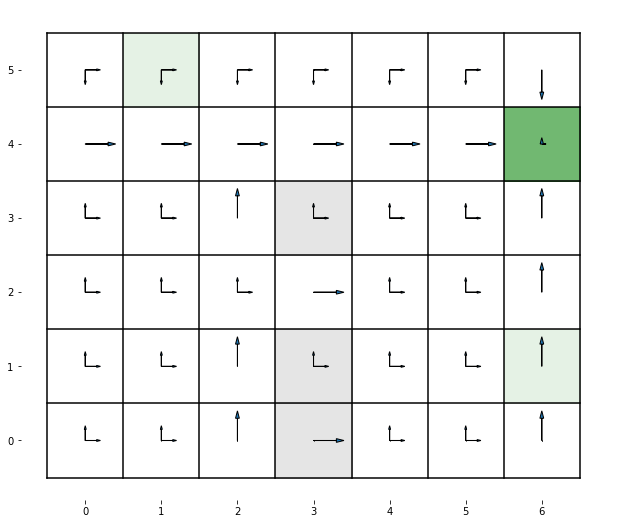

In [12]:
visualizeValueTable(gridWidth = gridWidth, gridHeight = gridHeight, goalState = goalB, otherGoals = otherGoals, trapStates = trapStates, valueTable = optimalValuesB)
visualizePolicy(gridWidth, gridHeight, goalB, otherGoals, trapStates, policyB)

## Goal C

In [13]:
goalC = (1,5)
getRewardC = SetupRewardTable(environment1Transition, allActions, goalC, trapStates)
#rewardC = getRewardC()
valueC = {state:0 for state in rewardC.keys()}

getPolicyC = BoltzmannValueIteration(environment1Transition, rewardC, valueC, convergenceThreshold, gamma, beta)
optimalValuesC, policyC = getPolicyC()

In [14]:
rewardC

{(0, 0): {(1, 0): {(1, 0): -1},
  (0, 1): {(0, 1): -1},
  (-1, 0): {(0, 0): -1},
  (0, -1): {(0, 0): -1},
  (0, 0): {(0, 0): -0.1}},
 (0, 1): {(1, 0): {(1, 1): -1},
  (0, 1): {(0, 2): -1},
  (-1, 0): {(0, 1): -1},
  (0, -1): {(0, 0): -1},
  (0, 0): {(0, 1): -0.1}},
 (0, 2): {(1, 0): {(1, 2): -1},
  (0, 1): {(0, 3): -1},
  (-1, 0): {(0, 2): -1},
  (0, -1): {(0, 1): -1},
  (0, 0): {(0, 2): -0.1}},
 (0, 3): {(1, 0): {(1, 3): -1},
  (0, 1): {(0, 4): -1},
  (-1, 0): {(0, 3): -1},
  (0, -1): {(0, 2): -1},
  (0, 0): {(0, 3): -0.1}},
 (0, 4): {(1, 0): {(1, 4): -1},
  (0, 1): {(0, 5): -1},
  (-1, 0): {(0, 4): -1},
  (0, -1): {(0, 3): -1},
  (0, 0): {(0, 4): -0.1}},
 (0, 5): {(1, 0): {(1, 5): -1},
  (0, 1): {(0, 5): -1},
  (-1, 0): {(0, 5): -1},
  (0, -1): {(0, 4): -1},
  (0, 0): {(0, 5): -0.1}},
 (1, 0): {(1, 0): {(2, 0): -1},
  (0, 1): {(1, 1): -1},
  (-1, 0): {(0, 0): -1},
  (0, -1): {(1, 0): -1},
  (0, 0): {(1, 0): -0.1}},
 (1, 1): {(1, 0): {(2, 1): -1},
  (0, 1): {(1, 2): -1},
  (-1, 0): {(

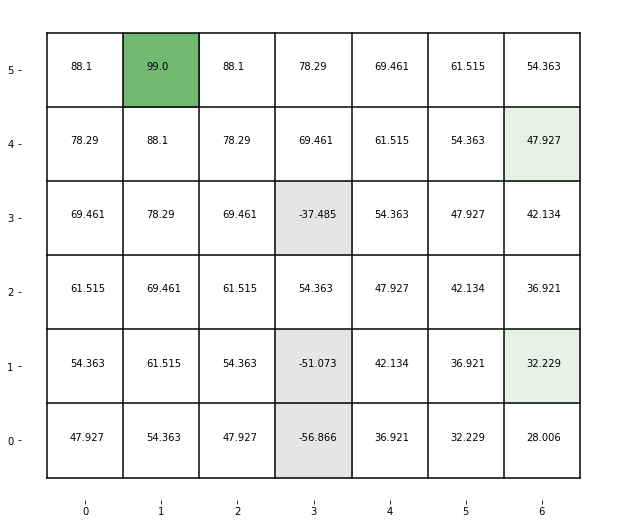

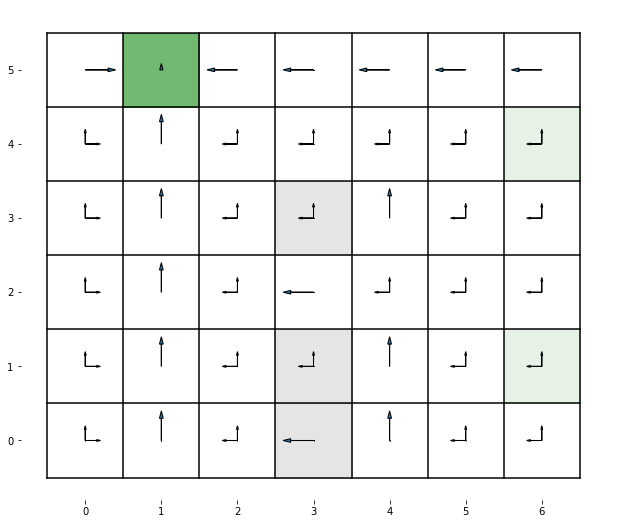

In [15]:
visualizeValueTable(gridWidth = gridWidth, gridHeight = gridHeight, goalState = goalC, otherGoals = otherGoals, trapStates = trapStates, valueTable = optimalValuesC)
visualizePolicy(gridWidth, gridHeight, goalC, otherGoals, trapStates, policyC)

## Joint Policies

In [16]:
environment1Policies = {'a':policyA, 'b':policyB, 'c': policyC}

In [17]:
getLikelihoodReward = getLikelihoodRewardFunction(environment1Transition, environment1Policies)
infoRewardA = getLikelihoodReward('a', rewardA)
infoRewardB = getLikelihoodReward('b', rewardB)
infoRewardC = getLikelihoodReward('c', rewardC)

In [18]:
newValueA = {state:0 for state in infoRewardA.keys()}

getNewPolicyA = BoltzmannValueIteration(environment1Transition, infoRewardA, newValueA, convergenceThreshold, gamma, beta)
newOptimalA, newPolicyA = getNewPolicyA()

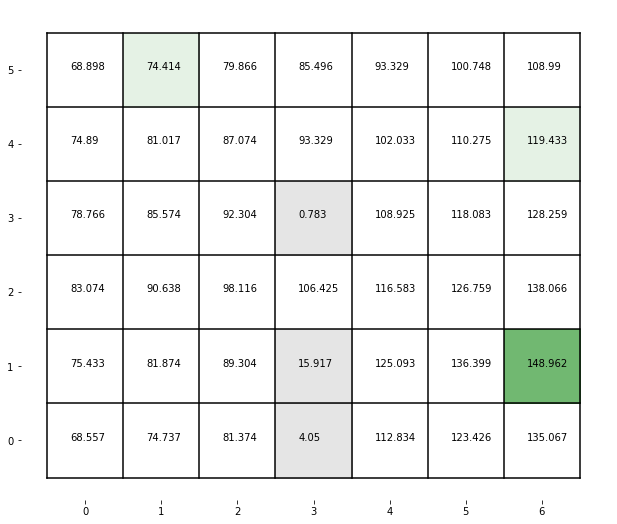

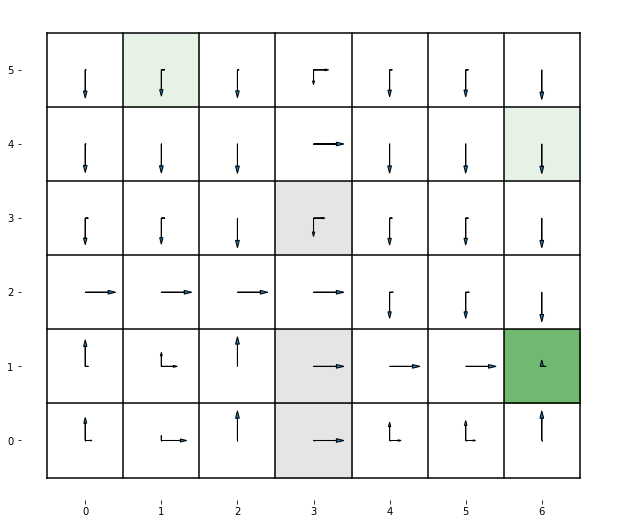

In [19]:
visualizeValueTable(gridWidth = gridWidth, gridHeight = gridHeight, goalState = goalA, otherGoals=otherGoals, trapStates = trapStates, valueTable = newOptimalA)
visualizePolicy(gridWidth, gridHeight, goalA, otherGoals, trapStates, newPolicyA)

In [20]:
newValueB = {state:0 for state in infoRewardB.keys()}

getNewPolicyB = BoltzmannValueIteration(environment1Transition, infoRewardB, newValueB, convergenceThreshold, gamma, beta)
newOptimalB, newPolicyB = getNewPolicyB()

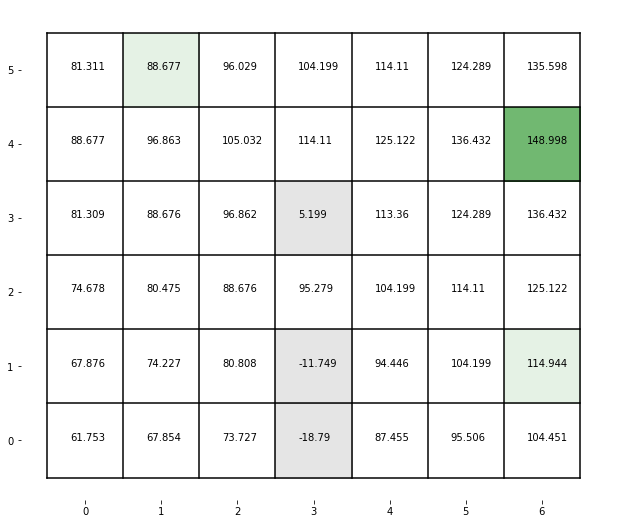

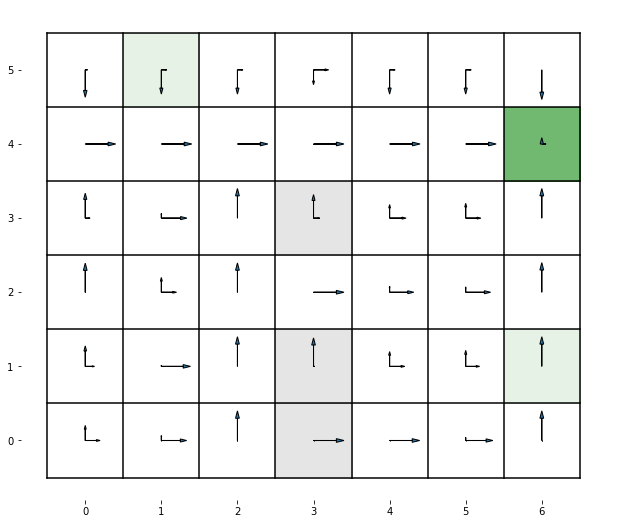

In [21]:
visualizeValueTable(gridWidth = gridWidth, gridHeight = gridHeight, goalState = goalB, otherGoals=otherGoals, trapStates = trapStates, valueTable = newOptimalB)
visualizePolicy(gridWidth, gridHeight, goalB, otherGoals, trapStates, newPolicyB)

In [22]:
newValueC = {state:0 for state in infoRewardC.keys()}

getNewPolicyC = BoltzmannValueIteration(environment1Transition, infoRewardC, newValueC, convergenceThreshold, gamma, beta)
newOptimalC, newPolicyC = getNewPolicyC()

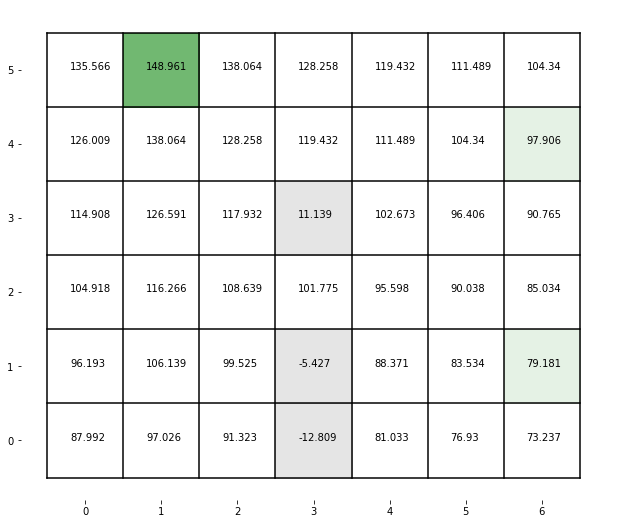

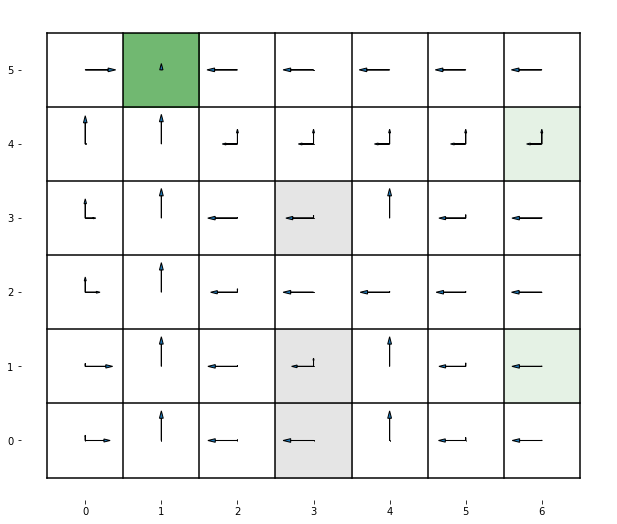

In [23]:
visualizeValueTable(gridWidth = gridWidth, gridHeight = gridHeight, goalState = goalC, otherGoals=otherGoals, trapStates = trapStates, valueTable = newOptimalC)
visualizePolicy(gridWidth, gridHeight, goalC, otherGoals, trapStates, newPolicyC)

# Environment 2

In [24]:
gridWidth = 6
gridHeight = 9
allActions = [(1,0), (0,1), (-1,0), (0,-1), (0,0)]
trapStates = [(3,1), (3,2), (3,3), (3,4), (3,5), (3,7), (3,8)]

np.random.seed(124)
#getTransition = SetupTransition(gridWidth, gridHeight, allActions)
#environment2Transition = getTransition()

getDetTransition = SetupDeterministicTransition(gridWidth, gridHeight, allActions)
environment2Transition = getDetTransition()

## Goal X

In [25]:
goalX = (0,2)
getRewardX = SetupRewardTable(environment2Transition, allActions, goalX, trapStates)
rewardX = getRewardX()
valueX = {state:0 for state in rewardX.keys()}

getPolicyX = BoltzmannValueIteration(environment2Transition, rewardX, valueX, convergenceThreshold, gamma, beta)
optimalValuesX, policyX = getPolicyX()

## Goal Y

In [26]:
goalY = (5,2)
getRewardY = SetupRewardTable(environment2Transition, allActions, goalY, trapStates)
rewardY = getRewardY()
valueY = {state:0 for state in rewardY.keys()}

getPolicyY = BoltzmannValueIteration(environment2Transition, rewardY, valueY, convergenceThreshold, gamma, beta)
optimalValuesY, policyY = getPolicyY()

## Goal Z

In [27]:
goalZ = (4,8)
getRewardZ = SetupRewardTable(environment2Transition, allActions, goalZ, trapStates)
rewardZ = getRewardZ()
valueZ = {state:0 for state in rewardZ.keys()}

getPolicyZ = BoltzmannValueIteration(environment2Transition, rewardZ, valueZ, convergenceThreshold, gamma, beta)
optimalValuesZ, policyZ = getPolicyZ()

## Single Goal Visualizations

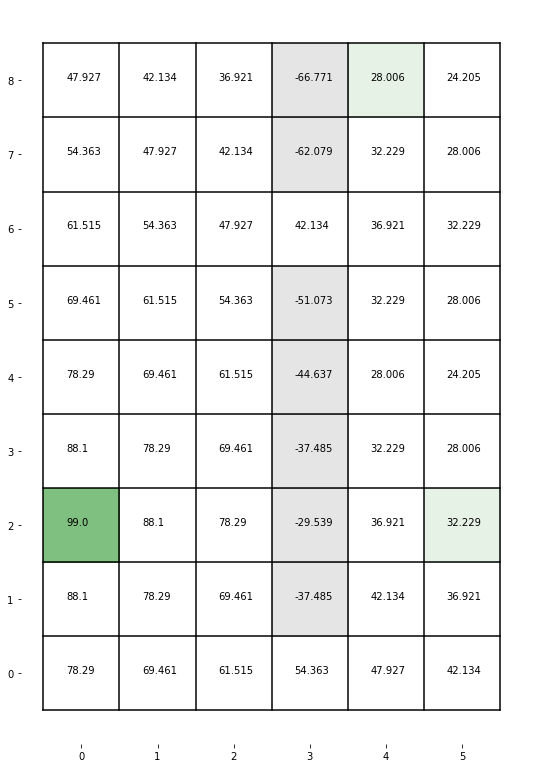

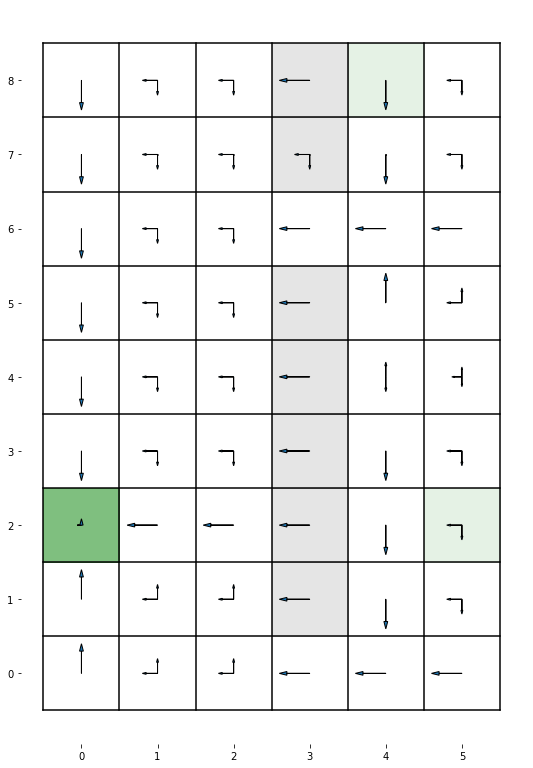

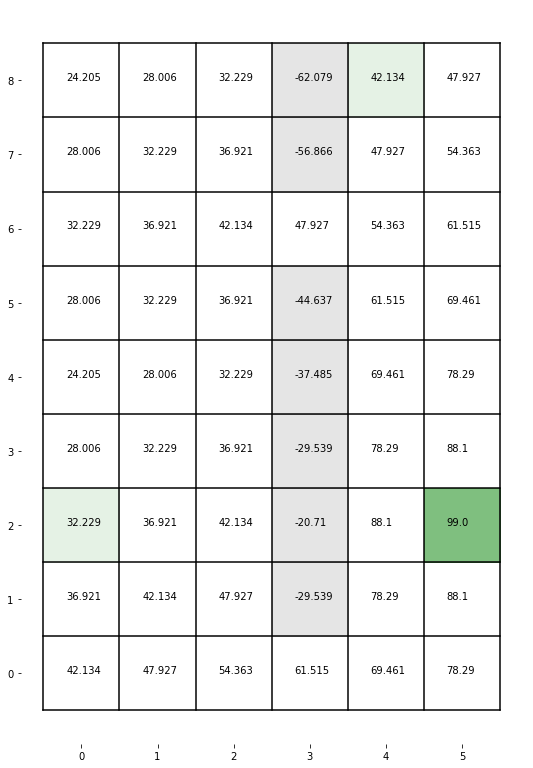

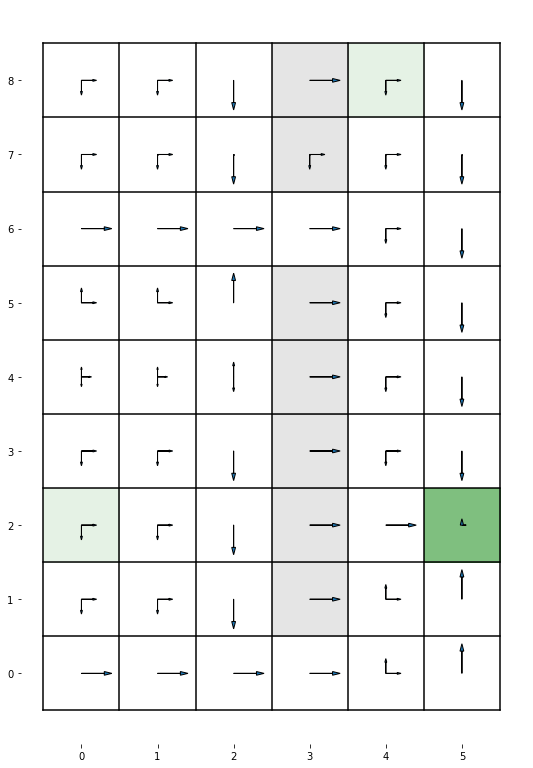

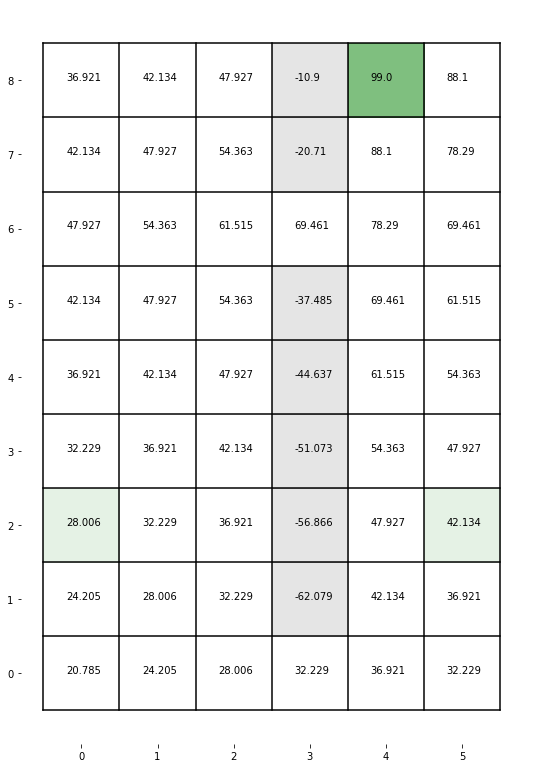

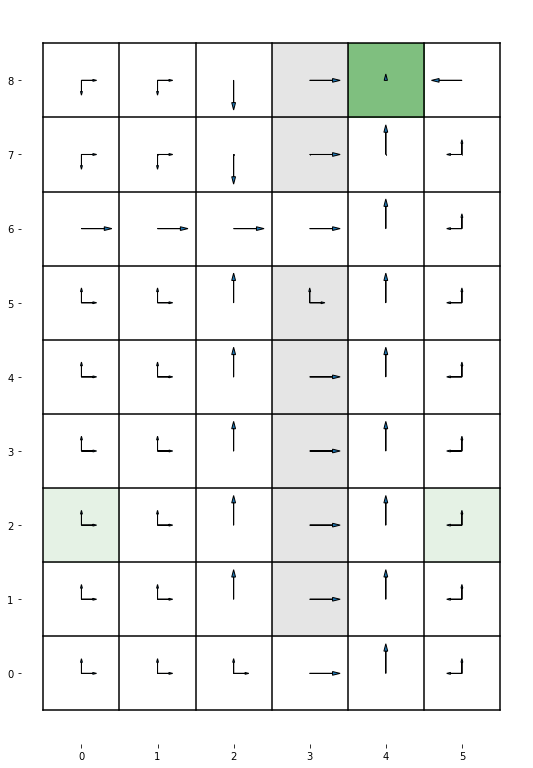

In [28]:
visualizeValueTable(gridWidth = gridWidth, gridHeight = gridHeight, goalState = goalX, otherGoals = [goalY, goalZ], trapStates = trapStates, valueTable = optimalValuesX)
visualizePolicy(gridWidth, gridHeight, goalX, [goalY, goalZ], trapStates, policyX)


visualizeValueTable(gridWidth = gridWidth, gridHeight = gridHeight, goalState = goalY, otherGoals = [goalX, goalZ],trapStates = trapStates, valueTable = optimalValuesY)
visualizePolicy(gridWidth, gridHeight, goalY, [goalX, goalZ], trapStates, policyY)


visualizeValueTable(gridWidth = gridWidth, gridHeight = gridHeight, goalState = goalZ, otherGoals = [goalY, goalX],trapStates = trapStates, valueTable = optimalValuesZ)
visualizePolicy(gridWidth, gridHeight, goalZ, [goalY, goalX], trapStates, policyZ)

## Joint Policies

In [29]:
environment2Policies = {'x':policyX, 'y':policyY, 'z':policyZ}

In [30]:
getLikelihoodReward2 = getLikelihoodRewardFunction(environment2Transition, environment2Policies)
newRewardX = getLikelihoodReward2('x', rewardX)
newRewardY = getLikelihoodReward2('y', rewardY)
newRewardZ = getLikelihoodReward2('z', rewardZ)

In [31]:
newValueX = {state:0 for state in newRewardX.keys()}
getNewPolicyX = BoltzmannValueIteration(environment2Transition, newRewardX, newValueX, convergenceThreshold, gamma, beta)
newOptimalX, newPolicyX = getNewPolicyX()

In [32]:
newValueY = {state:0 for state in newRewardY.keys()}
getNewPolicyY = BoltzmannValueIteration(environment2Transition, newRewardY, newValueY, convergenceThreshold, gamma, beta)
newOptimalY, newPolicyY = getNewPolicyY()

In [33]:
newValueZ = {state:0 for state in newRewardZ.keys()}
getNewPolicyZ = BoltzmannValueIteration(environment2Transition, newRewardZ, newValueZ, convergenceThreshold, gamma, beta)
newOptimalZ, newPolicyZ = getNewPolicyZ()

## New Policy Visualizations

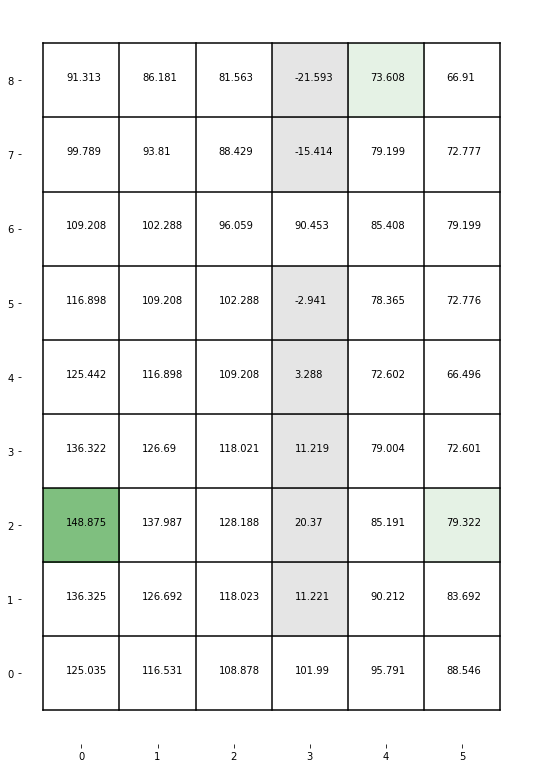

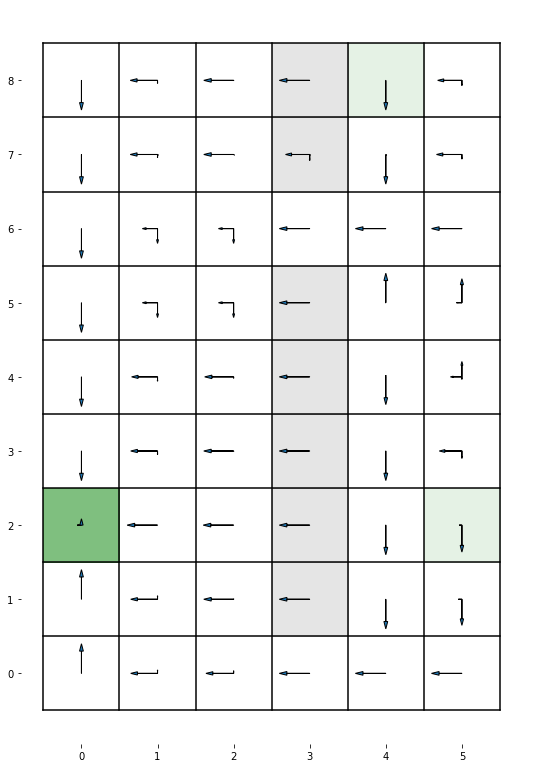

In [34]:
visualizeValueTable(gridWidth = gridWidth, gridHeight = gridHeight, goalState = goalX, otherGoals = [goalY, goalZ], trapStates = trapStates, valueTable = newOptimalX)
visualizePolicy(gridWidth, gridHeight, goalX, [goalY, goalZ], trapStates, newPolicyX)

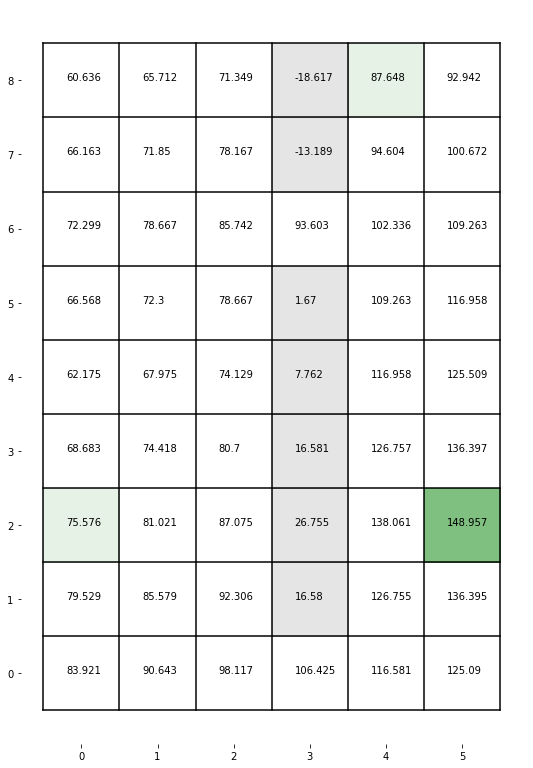

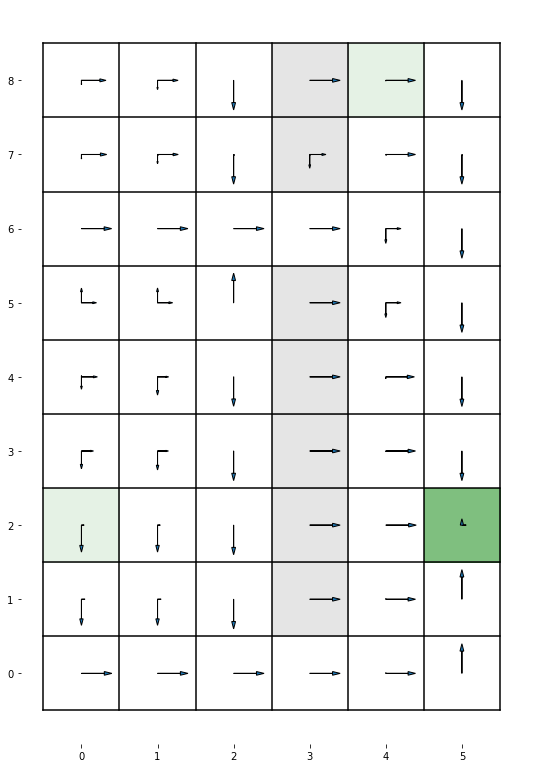

In [35]:
visualizeValueTable(gridWidth = gridWidth, gridHeight = gridHeight, goalState = goalY, otherGoals = [goalX, goalZ], trapStates = trapStates, valueTable = newOptimalY)
visualizePolicy(gridWidth, gridHeight, goalY, [goalX, goalZ], trapStates, newPolicyY)

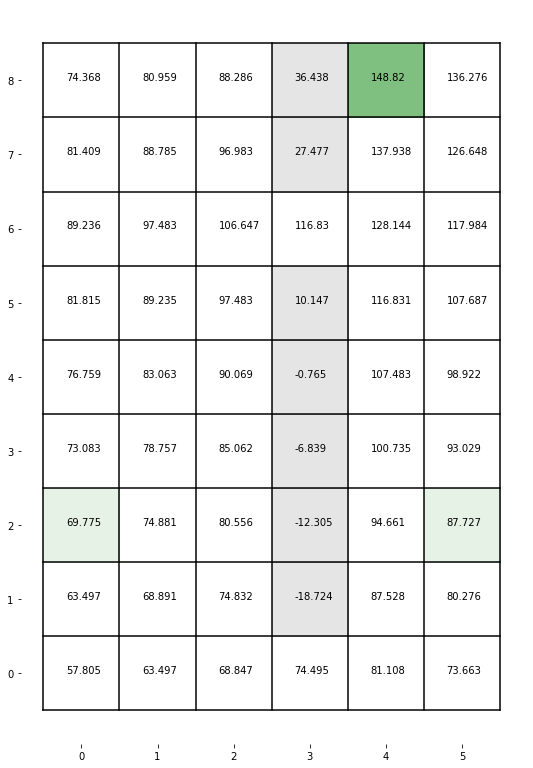

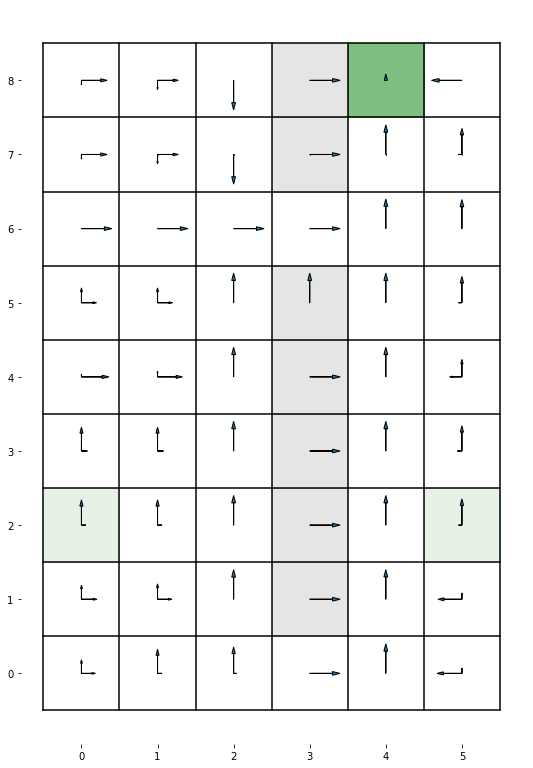

In [36]:
visualizeValueTable(gridWidth = gridWidth, gridHeight = gridHeight, goalState = goalZ, otherGoals = [goalY, goalX], trapStates = trapStates, valueTable = newOptimalZ)
visualizePolicy(gridWidth, gridHeight, goalZ, [goalY, goalX], trapStates, newPolicyZ)